Description of data:

In summary, the experimental runs were:

- Baseline, eyes open
- Baseline, eyes closed
- Task 1 (open and close left or right fist)
- Task 2 (imagine opening and closing left or right fist)
- Task 3 (open and close both fists or both feet)
- Task 4 (imagine opening and closing both fists or both feet)
- Task 1
- Task 2
- Task 3
- Task 4
- Task 1
- Task 2
- Task 3
- Task 4


Each annotation includes one of three codes (T0, T1, or T2):


- T0 corresponds to rest
- T1 corresponds to onset of motion (real or imagined) of
        the left fist (in runs 3, 4, 7, 8, 11, and 12)
        both fists (in runs 5, 6, 9, 10, 13, and 14)
- T2 corresponds to onset of motion (real or imagined) of
        the right fist (in runs 3, 4, 7, 8, 11, and 12)
        both feet (in runs 5, 6, 9, 10, 13, and 14)


The EEGs were recorded from 64 electrodes as per the international 10-10 system (excluding electrodes Nz, F9, F10, FT9, FT10, A1, A2, TP9, TP10, P9, and P10)

<img width="969" src="https://github.com/owalid/total-perspective-vortex/assets/28403617/3de37d6d-048e-4032-9c3c-eb070a8c184a">

In [33]:
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
import matplotlib.pyplot as plt
import glob

In [34]:
files = glob.glob('../files/S001/*.edf')

In [35]:
print(files)

['../files/S001/S001R08.edf', '../files/S001/S001R05.edf', '../files/S001/S001R01.edf', '../files/S001/S001R10.edf', '../files/S001/S001R11.edf', '../files/S001/S001R03.edf', '../files/S001/S001R07.edf', '../files/S001/S001R04.edf', '../files/S001/S001R06.edf', '../files/S001/S001R13.edf', '../files/S001/S001R12.edf', '../files/S001/S001R14.edf', '../files/S001/S001R02.edf', '../files/S001/S001R09.edf']


In [68]:
raws = [read_raw_edf(f, preload=True, stim_channel='auto') for f in files]
raw_obj = concatenate_raws(raws)

Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.9

In [56]:
raw_obj.ch_names

['Fc5.',
 'Fc3.',
 'Fc1.',
 'Fcz.',
 'Fc2.',
 'Fc4.',
 'Fc6.',
 'C5..',
 'C3..',
 'C1..',
 'Cz..',
 'C2..',
 'C4..',
 'C6..',
 'Cp5.',
 'Cp3.',
 'Cp1.',
 'Cpz.',
 'Cp2.',
 'Cp4.',
 'Cp6.',
 'Fp1.',
 'Fpz.',
 'Fp2.',
 'Af7.',
 'Af3.',
 'Afz.',
 'Af4.',
 'Af8.',
 'F7..',
 'F5..',
 'F3..',
 'F1..',
 'Fz..',
 'F2..',
 'F4..',
 'F6..',
 'F8..',
 'Ft7.',
 'Ft8.',
 'T7..',
 'T8..',
 'T9..',
 'T10.',
 'Tp7.',
 'Tp8.',
 'P7..',
 'P5..',
 'P3..',
 'P1..',
 'Pz..',
 'P2..',
 'P4..',
 'P6..',
 'P8..',
 'Po7.',
 'Po3.',
 'Poz.',
 'Po4.',
 'Po8.',
 'O1..',
 'Oz..',
 'O2..',
 'Iz..']

In [72]:
original_raw = raw_obj.copy()

In [70]:
raw_obj.apply_hilbert()

<RawEDF | S001R08.edf, 64 x 259520 (1622.0 s), ~253.5 MB, data loaded>

In [73]:
print(f'original data had {original_raw.info["nchan"]} channels.')
original_raw.pick("eeg")  # selects only the EEG channels
print(f'after picking, it has {original_raw.info["nchan"]} channels.')

original data had 64 channels.
after picking, it has 64 channels.


In [74]:
rereferenced_raw, ref_data = mne.set_eeg_reference(original_raw, ["Fc5."], copy=True)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


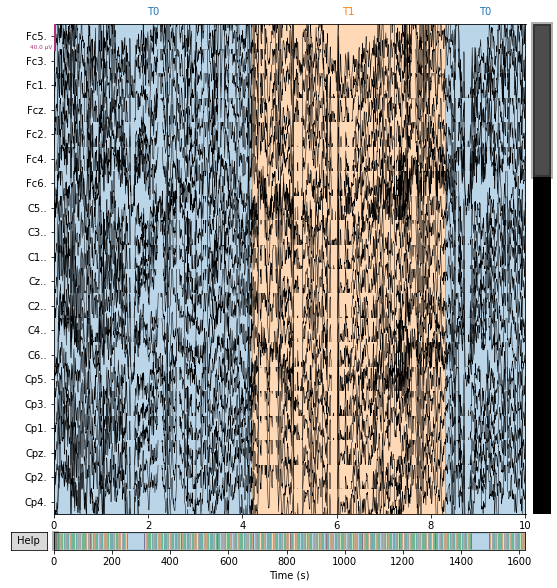

/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


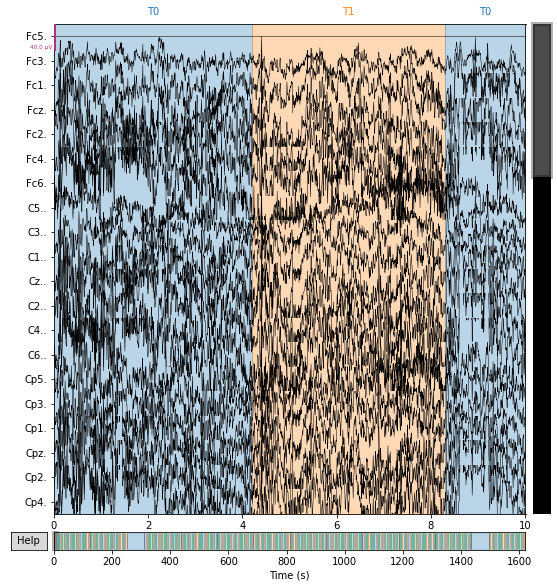

In [75]:
fig_orig = original_raw.plot()
fig_reref = rereferenced_raw.plot()

In [37]:
raw_obj = concatenate_raws(raws)

In [38]:
raw_data = raw_obj._data

print("Number of channels: ", str(len(raw_data)))
print("Number of samples: ", str(len(raw_data[0])))

Number of channels:  64
Number of samples:  259520


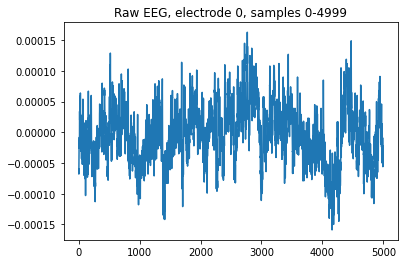

In [39]:
plt.plot(raw_data[0,:4999])
plt.title("Raw EEG, electrode 0, samples 0-4999")
plt.show()

In [40]:
events, event_ids = mne.events_from_annotations(raw_obj, event_id='auto')
event_ids

Used Annotations descriptions: ['T0', 'T1', 'T2']


{'T0': 1, 'T1': 2, 'T2': 3}

In [41]:
tmin, tmax = -1, 4  # define epochs around events (in s)
#event_ids = dict(hands=2, feet=3)  # map event IDs to tasks

epochs = mne.Epochs(raw_obj, events, event_ids, tmin - 0.5, tmax + 0.5, baseline=None, preload=True)

Not setting metadata
362 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 362 events and 961 original time points ...
14 bad epochs dropped


In [42]:
#Access to the data
data = epochs._data

n_events = len(data) # or len(epochs.events)
print("Number of events: " + str(n_events)) 

n_channels = len(data[0,:]) # or len(epochs.ch_names)
print("Number of channels: " + str(n_channels))

n_times = len(data[0,0,:]) # or len(epochs.times)
print("Number of time instances: " + str(n_times))


Number of events: 348
Number of channels: 64
Number of time instances: 961


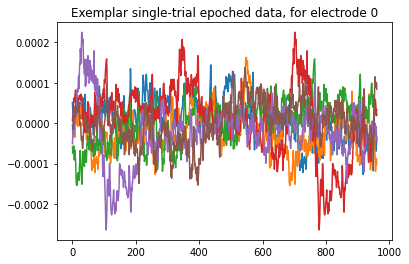

In [43]:
plt.plot(data[14:20,0,:].T)
plt.title("Exemplar single-trial epoched data, for electrode 0")
plt.show()
